In [20]:
# Global toolbox
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf



In [21]:
# Data initialization
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbols = ['NVDA', 'AMD', 'INTC', 'QCOM', 'AAPL', 'AVGO']
stocks= yf.download(stock_symbols, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


NVDA:
Mean: 31.725554052365904
Variance: 878.6597563442178
Skewness: 1.8799515512654923
Kurtosis: 5.771775081913024
AMD:
Mean: 100.64815152442841
Variance: 1238.7420433775753
Skewness: 0.6734634798536817
Kurtosis: 2.9307556421245193
INTC:
Mean: 41.40178281566354
Variance: 97.46513313090529
Skewness: -0.16579814301688636
Kurtosis: 1.9704835129192608
QCOM:
Mean: 126.97301678763135
Variance: 935.4688947051146
Skewness: 0.30841625441350046
Kurtosis: 3.4168102235519506
AAPL:
Mean: 146.75708252810944
Variance: 1399.1831360560786
Skewness: -0.3384441498694111
Kurtosis: 2.8440279984964416
AVGO:
Mean: 63.05962394002755
Variance: 1312.7443092867252
Skewness: 1.3369858427365726
Kurtosis: 3.955866685943595


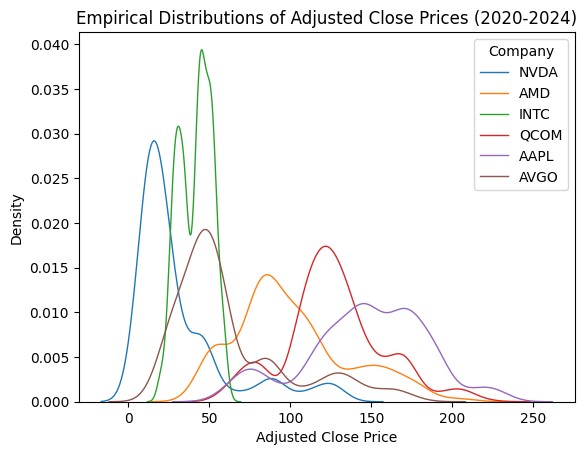

In [22]:
results = pd.DataFrame(columns=['Company', 'Mean', 'Variance', 'Skewness', 'Kurtosis'])

for symbol in stock_symbols:
    X = stocks[symbol].dropna().values
    mean = np.mean(X)
    variance = np.var(X)
    skewness = ss.skew(X, axis=0, bias=True)
    kurtosis = ss.kurtosis(X, axis=0, bias=True) + 3 
    
    print(f"{symbol}:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
 
    sns.kdeplot(data=X, linewidth=1, label=symbol)

plt.title("Empirical Distributions of Adjusted Close Prices (2020-2024)")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Density")
plt.legend(title="Company")
plt.show()


In [23]:
"Bootstrap"
for symbol in stock_symbols:
     X = stocks[symbol].values
     # Bootstrap parameters
     T= X.shape[0]
     B = 1000 # 5000, 100000 [250 9750]
     # using round() instead of int() casting to reduce conversion error
     upper_bound = round(B * 0.975)
     lower_bound = round(B * 0.025)
     mu_boot = np.zeros(B)
     se_boot = np.zeros(B)
     x_boot_std = np.zeros(B)

    # Bootstrap
     for i in range(0, B):
          x_boot = X[np.random.choice(T,T)]
          mu_boot[i] = np.mean(x_boot)
          se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
          x_boot_std[i] = np.std(x_boot) # std of x_boot
          # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
     mu_boot = np.sort(mu_boot)
     se_boot = np.sort(se_boot)
     xboot_std = np.sort(x_boot_std)
    
     print(f"{symbol}:")
     print(f"Mean Confidence Interval (95%): [{round(mu_boot[lower_bound], 3)}, {round(mu_boot[upper_bound], 3)}]")
     print(f"Standard Error of Mean Confidence Interval (95%): [{round(se_boot[lower_bound], 3)}, {round(se_boot[upper_bound], 3)}]")
     print(f"{symbol} Stock Price Std Confidence Interval (Method 1, 95%): [{round(se_boot[lower_bound] * np.sqrt(T), 3)}, {round(se_boot[upper_bound] * np.sqrt(T), 3)}]")
     print(f"{symbol} Stock Price Std Confidence Interval (Method 2, 95%): [{round(x_boot_std[lower_bound], 3)}, {round(x_boot_std[upper_bound], 3)}]")
    

NVDA:
Mean Confidence Interval (95%): [30.084, 33.431]
Standard Error of Mean Confidence Interval (95%): [0.805, 0.917]
NVDA Stock Price Std Confidence Interval (Method 1, 95%): [27.591, 31.418]
NVDA Stock Price Std Confidence Interval (Method 2, 95%): [28.222, 29.253]
AMD:
Mean Confidence Interval (95%): [98.577, 102.713]
Standard Error of Mean Confidence Interval (95%): [0.986, 1.068]
AMD Stock Price Std Confidence Interval (Method 1, 95%): [33.776, 36.577]
AMD Stock Price Std Confidence Interval (Method 2, 95%): [35.91, 36.577]
INTC:
Mean Confidence Interval (95%): [40.818, 41.991]
Standard Error of Mean Confidence Interval (95%): [0.28, 0.296]
INTC Stock Price Std Confidence Interval (Method 1, 95%): [9.583, 10.144]
INTC Stock Price Std Confidence Interval (Method 2, 95%): [9.903, 9.818]
QCOM:
Mean Confidence Interval (95%): [125.4, 128.85]
Standard Error of Mean Confidence Interval (95%): [0.851, 0.932]
QCOM Stock Price Std Confidence Interval (Method 1, 95%): [29.148, 31.946]
QCO